In [1360]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "WA_Fn-UseC_-Telco-Customer-Churn.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "blastchar/telco-customer-churn",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)



/tmp/ipython-input-3465749855.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'telco-customer-churn' dataset.


In [1361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1362]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1363]:
df.shape

(7043, 21)

In [1364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [1365]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [1366]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [1367]:
nan_rows = df[df['TotalCharges'].isna()]
display(nan_rows)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [1368]:
df.fillna(0, inplace=True)

In [1369]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [1370]:
df.duplicated().sum()

np.int64(0)

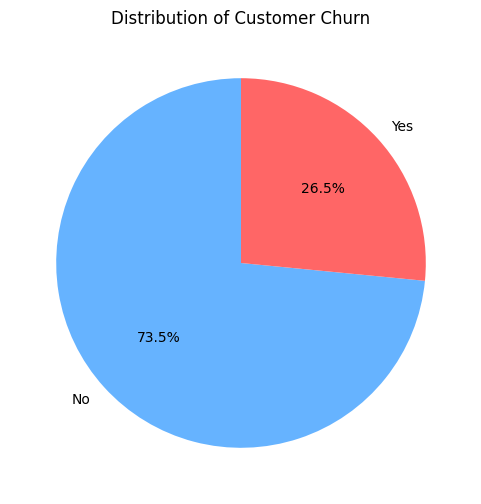

In [1371]:
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff6666'])
plt.title('Distribution of Customer Churn')
plt.show()

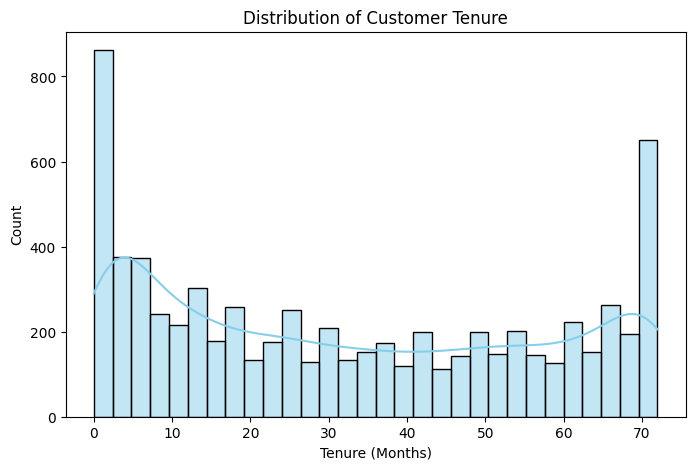

In [1372]:
plt.figure(figsize=(8,5))
sns.histplot(df['tenure'], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (Months)")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-369998271.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm")


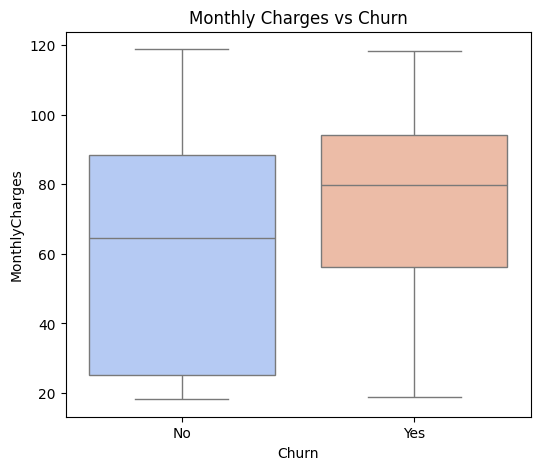

In [1373]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="coolwarm")
plt.title("Monthly Charges vs Churn")
plt.show()

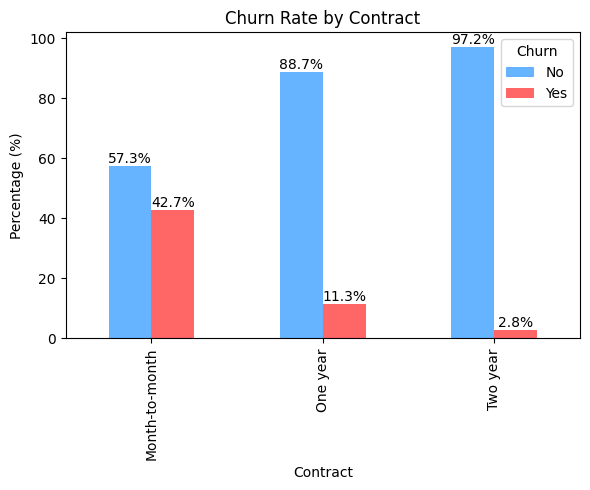

In [1374]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5))


cross_tab = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

cross_tab.plot(kind='bar', ax=axes, color=['#66b3ff', '#ff6666'])
axes.set_title(f'Churn Rate by Contract')
axes.set_ylabel('Percentage (%)')
axes.legend(title='Churn', loc='upper right')

for p in axes.patches:
    axes.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

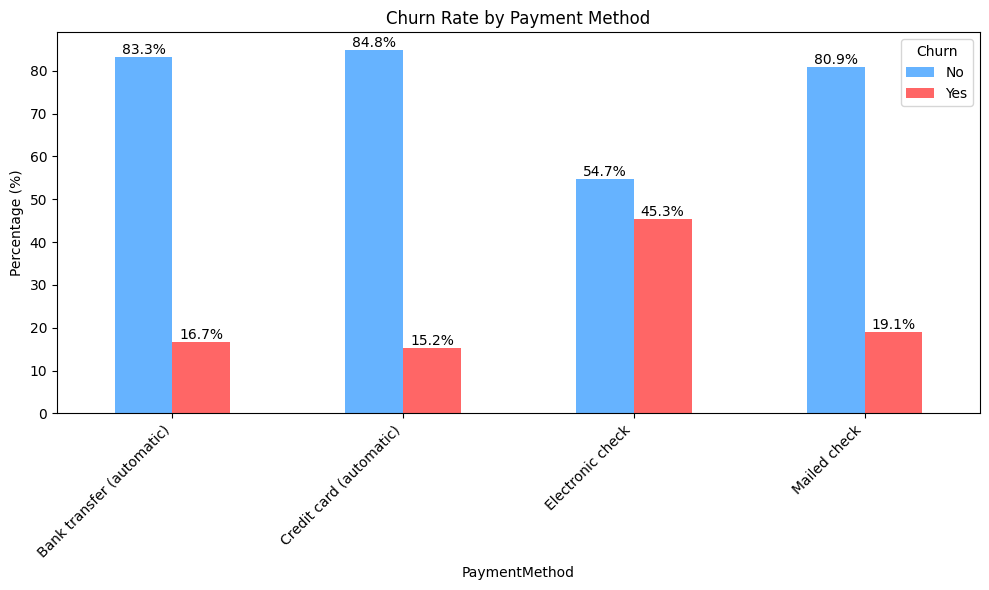

In [1375]:
fig, axes = plt.subplots(1, 1, figsize=(10, 6))

cross_tab = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100

cross_tab.plot(kind='bar', ax=axes, color=['#66b3ff', '#ff6666'])
axes.set_title('Churn Rate by Payment Method')
axes.set_ylabel('Percentage (%)')
axes.legend(title='Churn', loc='upper right')


plt.xticks(rotation=45, ha='right')


for p in axes.patches:
    axes.annotate(f'{p.get_height():.1f}%',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

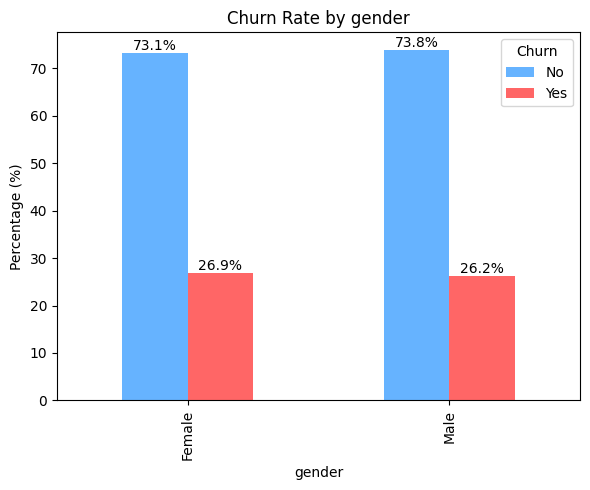

In [1376]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5))


cross_tab = pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100

cross_tab.plot(kind='bar', ax=axes, color=['#66b3ff', '#ff6666'])
axes.set_title(f'Churn Rate by gender')
axes.set_ylabel('Percentage (%)')
axes.legend(title='Churn', loc='upper right')

for p in axes.patches:
    axes.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

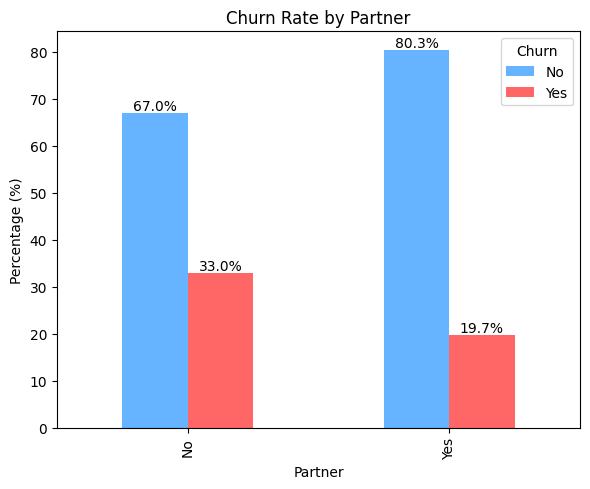

In [1377]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5))


cross_tab = pd.crosstab(df['Partner'], df['Churn'], normalize='index') * 100

cross_tab.plot(kind='bar', ax=axes, color=['#66b3ff', '#ff6666'])
axes.set_title(f'Churn Rate by Partner')
axes.set_ylabel('Percentage (%)')
axes.legend(title='Churn', loc='upper right')

for p in axes.patches:
    axes.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

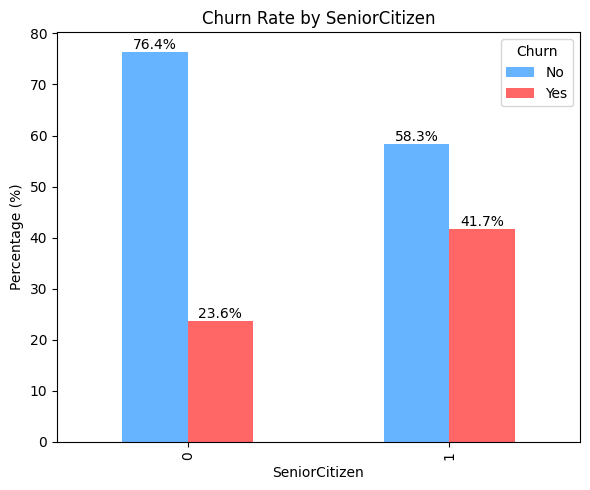

In [1378]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5))


cross_tab = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

cross_tab.plot(kind='bar', ax=axes, color=['#66b3ff', '#ff6666'])
axes.set_title(f'Churn Rate by SeniorCitizen')
axes.set_ylabel('Percentage (%)')
axes.legend(title='Churn', loc='upper right')

for p in axes.patches:
    axes.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

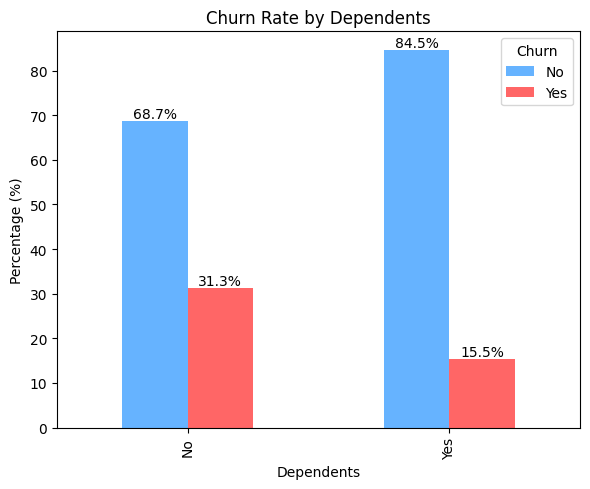

In [1379]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5))


cross_tab = pd.crosstab(df['Dependents'], df['Churn'], normalize='index') * 100

cross_tab.plot(kind='bar', ax=axes, color=['#66b3ff', '#ff6666'])
axes.set_title(f'Churn Rate by Dependents')
axes.set_ylabel('Percentage (%)')
axes.legend(title='Churn', loc='upper right')

for p in axes.patches:
    axes.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

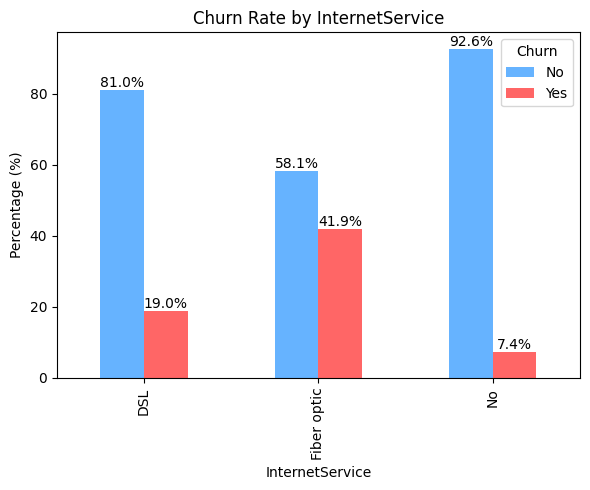

In [1380]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5))


cross_tab = pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100

cross_tab.plot(kind='bar', ax=axes, color=['#66b3ff', '#ff6666'])
axes.set_title(f'Churn Rate by InternetService')
axes.set_ylabel('Percentage (%)')
axes.legend(title='Churn', loc='upper right')

for p in axes.patches:
    axes.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

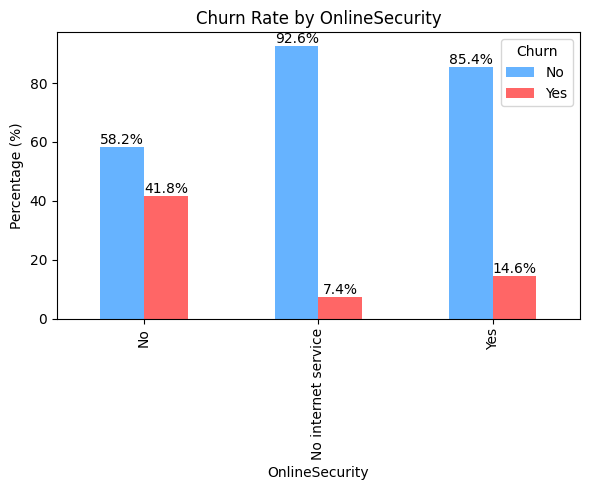

In [1381]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5))


cross_tab = pd.crosstab(df['OnlineSecurity'], df['Churn'], normalize='index') * 100

cross_tab.plot(kind='bar', ax=axes, color=['#66b3ff', '#ff6666'])
axes.set_title(f'Churn Rate by OnlineSecurity')
axes.set_ylabel('Percentage (%)')
axes.legend(title='Churn', loc='upper right')

for p in axes.patches:
    axes.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

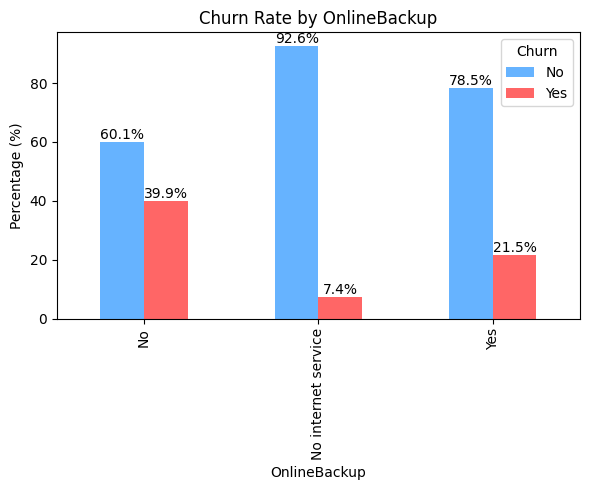

In [1382]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5))


cross_tab = pd.crosstab(df['OnlineBackup'], df['Churn'], normalize='index') * 100

cross_tab.plot(kind='bar', ax=axes, color=['#66b3ff', '#ff6666'])
axes.set_title(f'Churn Rate by OnlineBackup')
axes.set_ylabel('Percentage (%)')
axes.legend(title='Churn', loc='upper right')

for p in axes.patches:
    axes.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

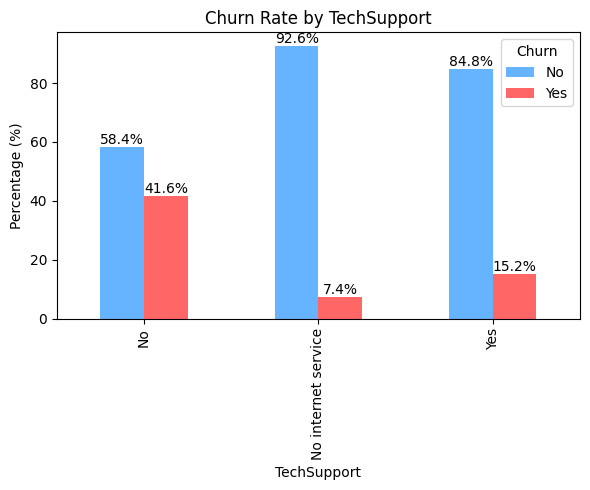

In [1383]:
fig, axes = plt.subplots(1, 1, figsize=(6, 5))


cross_tab = pd.crosstab(df['TechSupport'], df['Churn'], normalize='index') * 100

cross_tab.plot(kind='bar', ax=axes, color=['#66b3ff', '#ff6666'])
axes.set_title(f'Churn Rate by TechSupport')
axes.set_ylabel('Percentage (%)')
axes.legend(title='Churn', loc='upper right')

for p in axes.patches:
    axes.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                  ha='center', va='bottom')

plt.tight_layout()
plt.show()

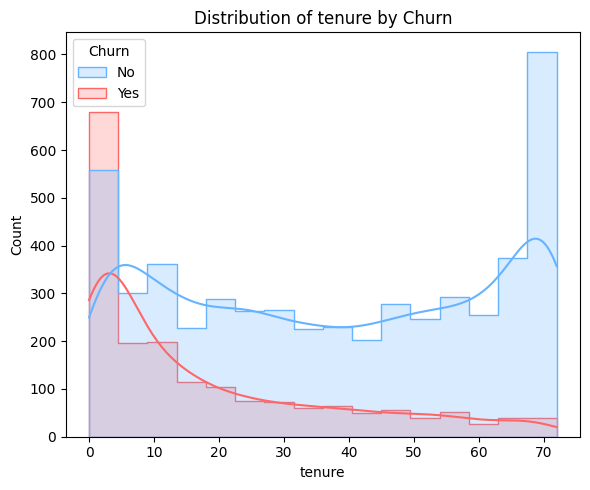

In [1384]:
fig, axes = plt.subplots(1, figsize=(6, 5))

sns.histplot(data=df, x='tenure', hue='Churn', kde=True, ax=axes, element='step', palette={ 'No': '#66b3ff', 'Yes': '#ff6666' })
axes.set_title(f'Distribution of {'tenure'} by Churn')

plt.tight_layout()
plt.show()

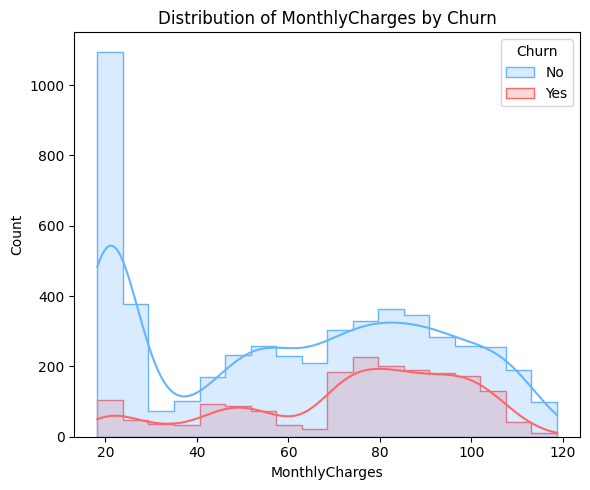

In [1385]:
fig, axes = plt.subplots(1, figsize=(6, 5))

sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, ax=axes, element='step', palette={ 'No': '#66b3ff', 'Yes': '#ff6666' })
axes.set_title(f'Distribution of {'MonthlyCharges'} by Churn')

plt.tight_layout()
plt.show()

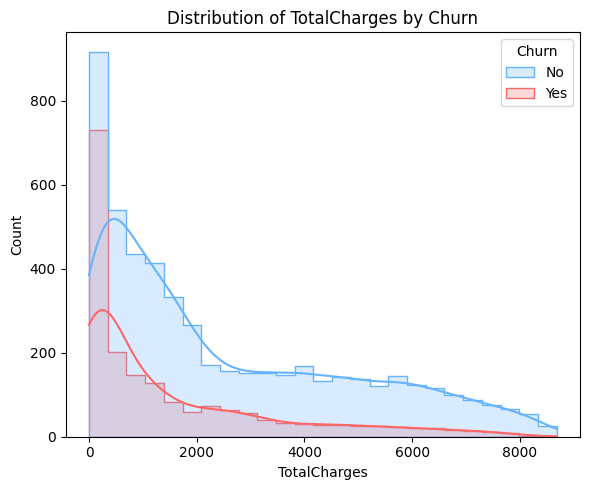

In [1386]:
fig, axes = plt.subplots(1, figsize=(6, 5))

sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, ax=axes, element='step', palette={ 'No': '#66b3ff', 'Yes': '#ff6666' })
axes.set_title(f'Distribution of {'TotalCharges'} by Churn')

plt.tight_layout()
plt.show()

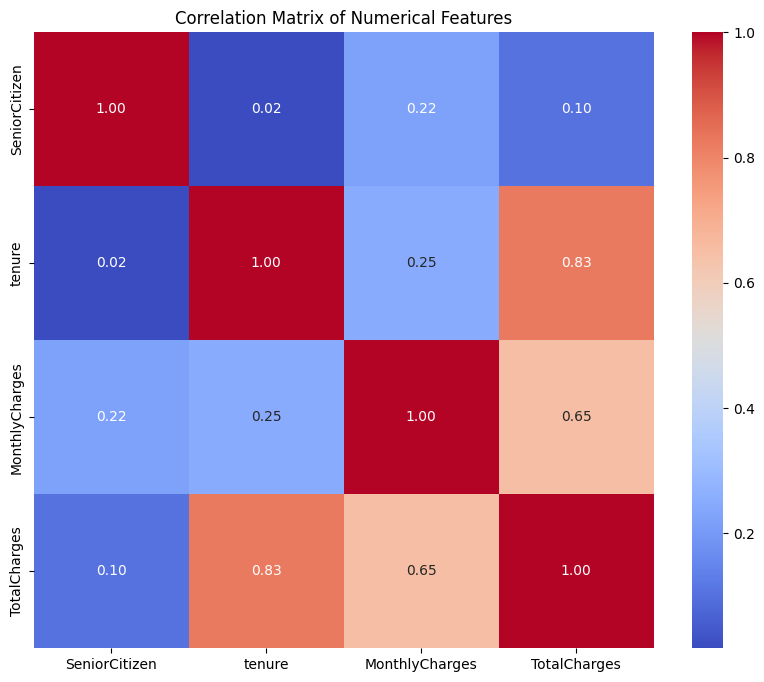

In [1387]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [1388]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [1389]:
df.drop(['gender','tenure'],axis=1,inplace=True)

In [1390]:
df.head()

,customerID,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1391]:
df.drop('customerID',axis=1,inplace=True)

In [1392]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [1393]:
df[df['Churn']=="Yes"].describe()

,SeniorCitizen,MonthlyCharges,TotalCharges
count,1869.000000,1869.000000,1869.000000
mean,0.254682,74.441332,1531.796094
std,0.435799,24.666053,1890.822994
min,0.000000,18.850000,18.850000
25%,0.000000,56.150000,134.500000
50%,0.000000,79.650000,703.550000
75%,1.000000,94.200000,2331.300000
max,1.000000,118.350000,8684.800000


In [1394]:
df[df['Churn']=="No"].describe()

,SeniorCitizen,MonthlyCharges,TotalCharges
count,5174.000000,5174.000000,5174.000000
mean,0.128721,61.265124,2549.911442
std,0.334923,31.092648,2329.954215
min,0.000000,18.250000,0.000000
25%,0.000000,25.100000,572.900000
50%,0.000000,64.425000,1679.525000
75%,0.000000,88.400000,4262.850000
max,1.000000,118.750000,8672.450000


In [1395]:
num_col=df.select_dtypes('number')
num_col

,SeniorCitizen,MonthlyCharges,TotalCharges
0,0,29.85,29.85
1,0,56.95,1889.50
2,0,53.85,108.15
3,0,42.30,1840.75
4,0,70.70,151.65
...,...,...,...
7038,0,84.80,1990.50
7039,0,103.20,7362.90
7040,0,29.60,346.45
7041,1,74.40,306.60


In [1396]:
cat_col=df.select_dtypes('object')
cat_col

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [1397]:
for col in cat_col:
    print(col,df[col].nunique())

Partner 2
Dependents 2
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
Churn 2


In [1398]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [1399]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [1400]:
x_train = x_train.reset_index(drop=True)
x_test = x_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [1401]:
print(x_train.shape,y_train.shape)

(5634, 17) (5634,)


In [1402]:
print(x_test.shape,y_test.shape)

(1409, 17) (1409,)


In [1403]:
cat_col_train=x_train.select_dtypes('object')
cat_col_test=x_test.select_dtypes('object')

In [1404]:
num_col_train=x_train.select_dtypes('number')
num_col_test=x_test.select_dtypes('number')

In [1405]:
mask = pd.Series(True, index=x_train.index)


for col in num_col_train.columns:
    Q1 = x_train[col].quantile(0.25)
    Q3 = x_train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask &= (x_train[col] >= lower) & (x_train[col] <= upper)

X_train_clean = x_train[mask]
y_train_clean = y_train[mask]

In [1406]:
mask = pd.Series(True, index=x_test.index)


for col in num_col_test.columns:
    Q1 = x_test[col].quantile(0.25)
    Q3 = x_test[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    mask &= (x_test[col] >= lower) & (x_test[col] <= upper)

X_test_clean = x_test[mask]
y_test_clean = y_test[mask]

In [1407]:
print(x_train.shape,y_train.shape)

(5634, 17) (5634,)


In [1408]:
print(x_test.shape,y_test.shape)

(1409, 17) (1409,)


In [1409]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler

In [1410]:
ohe=OneHotEncoder(sparse_output=False,drop='first')
for col in cat_col_train:
    cat_col_train[col]=ohe.fit_transform(cat_col_train[[col]])
    cat_col_test[col]=ohe.transform(cat_col_test[[col]])
y_train=y_train.map({'Yes':1,'No':0})
y_test=y_test.map({'Yes':1,'No':0})

In [1411]:
cat_col_train.head()

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1412]:
cat_col_test.head()

,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [1413]:
sc=StandardScaler()
for col in num_col_train:
    num_col_train[col]=sc.fit_transform(num_col_train[[col]])
    num_col_test[col]=sc.transform(num_col_test[[col]])

In [1414]:
num_col_train.head()

,SeniorCitizen,MonthlyCharges,TotalCharges
0,-0.441773,-0.521976,-0.262257
1,-0.441773,0.337478,-0.503635
2,-0.441773,-0.809013,-0.749883
3,-0.441773,0.284384,-0.172722
4,-0.441773,-0.676279,-0.989374


In [1415]:
num_col_test.head()

,SeniorCitizen,MonthlyCharges,TotalCharges
0,-0.441773,1.629976,2.706828
1,2.263606,1.168725,-0.610260
2,-0.441773,0.445324,0.400116
3,-0.441773,0.440347,-0.364451
4,-0.441773,0.588013,1.588421


In [1416]:
x_train=pd.concat([num_col_train,cat_col_train],axis=1)
x_test=pd.concat([num_col_test,cat_col_test],axis=1)

In [1417]:
y_train

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
5629,0
5630,1
5631,1
5632,0


In [1418]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)


selector = SelectFromModel(xgb_model, prefit=True)

x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

x_train_selected=pd.DataFrame(x_train_selected)
x_test_selected=pd.DataFrame(x_test_selected)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [1419]:
x_train_selected.head()

,0,1
0,0.0,0.0
1,1.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [1420]:
x_test_selected.head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0


In [1421]:
print(x_train_selected.shape,y_train.shape)

(5634, 2) (5634,)


In [1422]:
print(x_test_selected.shape,y_test.shape)

(1409, 2) (1409,)


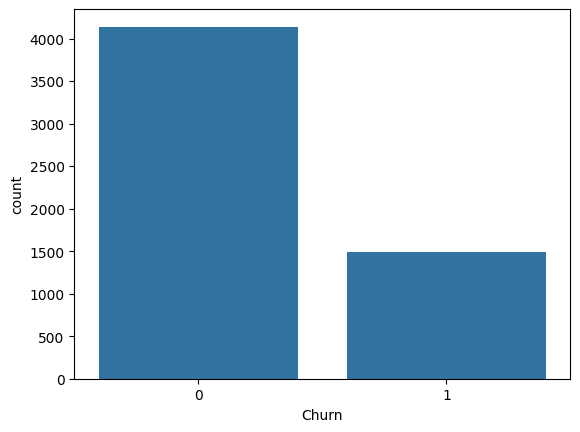

In [1423]:
sns.countplot(x=y_train,data=df)
plt.show()

In [1424]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_smote, y_train_smote = smote.fit_resample(x_train_selected, y_train)

print("Original training set shape:", x_train.shape)
print("Training set shape after SMOTE:", x_train_smote.shape)

Original training set shape: (5634, 17)
Training set shape after SMOTE: (8278, 2)


In [1425]:
from imblearn.over_sampling import SMOTEN

In [1426]:
smoten = SMOTEN(random_state=42)
x_train_smote, y_train_smote = smoten.fit_resample(x_train, y_train)

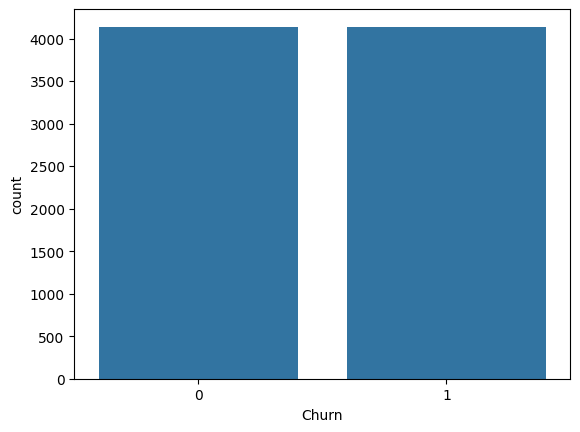

In [1427]:
sns.countplot(x=y_train_smote,data=df)
plt.show()

In [1428]:
from sklearn.decomposition import PCA

pca = PCA(n_components=.95)


x_train_pca = pca.fit_transform(x_train_selected)
x_test_pca = pca.transform(x_test_selected)

x_train_pca=pd.DataFrame(x_train_pca)
x_test_pca=pd.DataFrame(x_test_pca)

In [1429]:
x_train_pca.head()

,0,1
0,-0.245552,-0.424696
1,0.584372,0.133181
2,-0.245552,-0.424696
3,-0.245552,-0.424696
4,-0.245552,-0.424696


In [1430]:
x_test_pca.head()

,0,1
0,0.584372,0.133181
1,0.584372,0.133181
2,-0.245552,-0.424696
3,0.584372,0.133181
4,-0.245552,-0.424696


In [1431]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [1432]:
model=SVC(C=10, class_weight='balanced', gamma='auto',kernel='rbf', random_state=42)
model.fit(x_train_smote,y_train_smote)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1035
           1       0.60      0.61      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



In [1433]:
from xgboost import XGBClassifier

In [1434]:
model2=XGBClassifier(n_estimators=100,random_state=42,class_weight='balanced')
model.fit(x_train_smote,y_train_smote)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1035
           1       0.60      0.61      0.61       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409



In [1435]:
from sklearn.ensemble import RandomForestClassifier

In [1436]:
model=RandomForestClassifier(class_weight='balanced',max_depth=15, n_estimators=100,
                                        random_state=42)
model.fit(x_train_smote,y_train_smote)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1035
           1       0.58      0.52      0.55       374

    accuracy                           0.77      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.77      0.77      1409



In [1437]:
from sklearn.ensemble import AdaBoostClassifier

In [1438]:
model=AdaBoostClassifier( n_estimators=100,
                                        random_state=42)
model.fit(x_train_smote,y_train_smote)
y_pred=model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1035
           1       0.58      0.65      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409

